## CS164 - Assignment 1
### Juan Castro Fernandez

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d 

# %matplotlib notebook

fig = plt.figure(figsize=(8,6))
left, bottom, width, height = 1, 1, 1, 1
ax = fig.add_axes([left, bottom, width, height]) 

#a
x_vals = np.linspace(0, 3, 100)

#theta
y_vals = np.linspace(0, np.pi, 100)
X1, Y1 = np.meshgrid(x_vals, y_vals)

# Z = 0.5*(-2*np.sin(Y)**2+np.sin(Y)*np.cos(Y)-2*np.sin(Y))*X**2+3*np.sin(Y)*X
Z = ((X1**2*np.sin(Y1)*np.cos(Y1))/2) - (X1**2*np.sin(Y1)**2) + (3*X1 * np.sin(Y1))-(X1**2*np.sin(Y1))

cp = plt.contour(X1, Y1, Z,100,cmap='RdBu')
plt.colorbar(cp)
ax.set_title('Contour Plot of A(a,theta)')
ax.set_xlabel('a (m)')
ax.set_ylabel('theta (radians)')
plt.show()

fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(111, projection='3d')

ax.contour3D(X1,Y1,Z,200,cmap='RdBu')
ax.plot_surface(X1, Y1, Z, cmap='RdBu', rcount=100,alpha=0.5)
plt.colorbar(cp)
ax.set_title('Contour Plot of A(a,theta) in 3D')
ax.set_xlabel('a (m)')
ax.set_ylabel('theta (radians)')
ax.set_zlabel('f(a,theta)')
plt.show()

<Figure size 800x600 with 2 Axes>

<Figure size 1100x800 with 2 Axes>

In [6]:
Y1.shape

(100, 100)

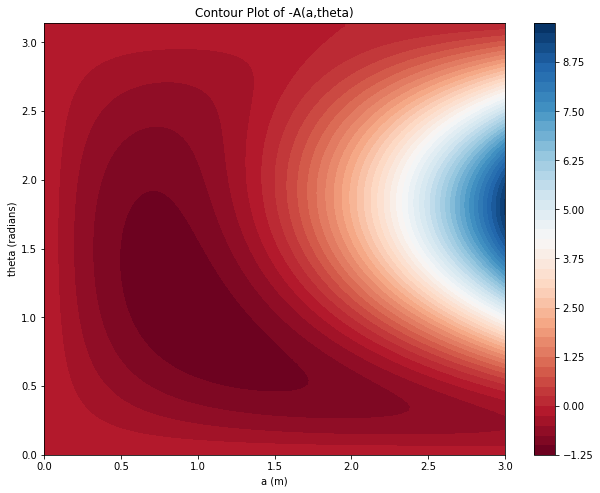

In [2]:
fig = plt.figure(figsize=(8,6))
left, bottom, width, height = 1, 1, 1, 1
ax = fig.add_axes([left, bottom, width, height]) 
cp = plt.contourf(X1, Y1, -Z,50,cmap='RdBu')
plt.colorbar(cp)
ax.set_title('Contour Plot of -A(a,theta)')
ax.set_xlabel('a (m)')
ax.set_ylabel('theta (radians)')
plt.show()

### Gradient Ascent with backtracking line search

In [3]:
import numpy as np

#x=a, y=theta
def A(x,y):
    return ((x**2*np.sin(y)*np.cos(y))/2) - (x**2*np.sin(y)**2) + (3*x * np.sin(y))-(x**2*np.sin(y))

def gradA(x,y):
    partial_x= np.sin(y)*(-2*x*np.sin(y)+x*np.cos(y)-2*x+3)
    partial_y= (1/2)*x*(-x*np.sin(y)**2+x*np.cos(y)**2-2*np.cos(y)*(2*x*np.sin(y)+x-3))
    return np.array([partial_x, partial_y])

def backtracking(alpha,beta,x,grad,s_init=1):
    v = grad/np.linalg.norm(grad)
    s = s_init
    d = np.dot(grad.T,v)
    while A(x[0]+s*v[0],x[1]+s*v[1]) < A(x[0],x[1])+s*alpha*d:
        s*=beta
    return s

def gradient_ascent(X0,line_search =  True,alpha=0.5,beta=0.5):
    X_k0 = [X0[0]]
    X_k1 = [X0[1]]
    X = X0
    X_old = X+1
    k = 0
    if line_search:
        while np.linalg.norm(X-X_old) > 1e-6:
            step = backtracking(alpha,beta,X,gradA(X[0],X[1]),1)
            X_new = X + step*gradA(X[0], X[1])/np.linalg.norm(gradA(X[0], X[1]))
            X_old = X
            X = X_new
            X_k0.append(X[0])
            X_k1.append(X[1])
            k+=1
    else:
        step = 0.01
        while np.linalg.norm(X-X_old) > 1e-6:
            X_new = X + step*gradA(X[0], X[1])
            X_old = X
            X = X_new
            X_k0.append(X[0])
            X_k1.append(X[1])
            k+=1
    return (X,X_k0,X_k1)

def plot2d(X_inits,line_search=True):
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_axes([1, 1, 1, 1]) 
    cp = plt.contour(X1, Y1, Z,100,cmap='RdBu')
    plt.colorbar(cp)
    for X0 in X_inits:
        R = gradient_ascent(X0,line_search=line_search)
        X_k0, X_k1 = R[1],R[2]
        k = len(X_k0) 
        plt.plot(X_k0,X_k1, label = 'X0 = {}, converged in {} steps'.format(X0,k))
        if not line_search:
            s=5
        else:
            s=30
        plt.scatter(X_k0,X_k1,s=s)    
    plt.legend()
    if line_search:
        title = 'Gradient Ascent of A(a,theta) with backtracking line search'
    else:
        title = 'Gradient Ascent of A(a,theta) without line search'
    ax.set_title(title)
    ax.set_xlabel('a (m)')
    ax.set_ylabel('theta (radians)')
    plt.show()
    if X0[0]==1.5 and X0[1]==0:
        print('Gradient Ascent converged in {} steps'.format(k))

def plot3d(X_inits,line_search=True):
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111, projection='3d')
    ax.contour3D(X1,Y1,Z,80,cmap='RdBu',alpha=0.6)
    ax.plot_surface(X1, Y1, Z, cmap='RdBu', rcount=100,alpha=0.5)
    for X0 in X_inits:
        R = gradient_ascent(X0,line_search=line_search)
        X_k0, X_k1 = R[1],R[2]
        k = len(X_k0)
        ax.plot(X_k0,X_k1,[A(X_k0[i],X_k1[i]) for i in range(len(X_k0))],linewidth=2,label = 'X0 = {}, converged in {} steps'.format(X0,k))
    if line_search:
        title = 'Gradient Ascent of A(a,theta) with backtracking line search'
    else:
        title = 'Gradient Ascent of A(a,theta) without line search'
    ax.set_title(title)
    plt.legend()
    plt.colorbar(cp)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.show()

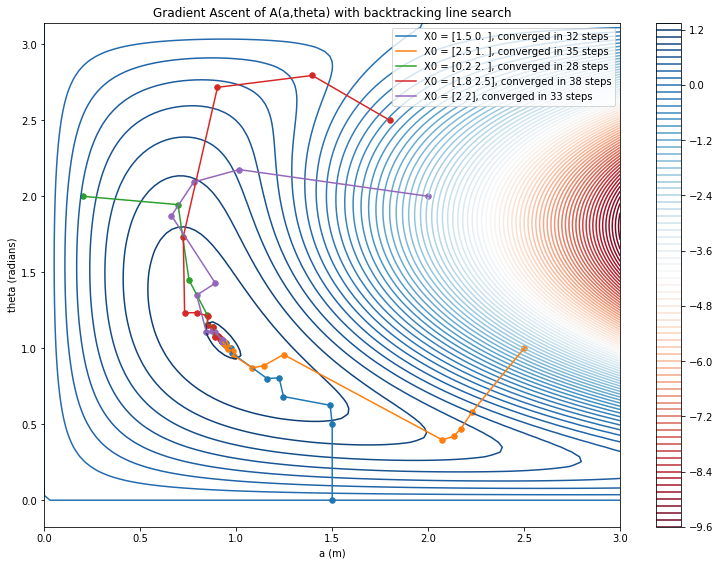

In [4]:
Xinits = [np.array([1.5,0]),np.array([2.5,1]),np.array([0.2,2]),np.array([1.8,2.5]),np.array([2,2])]
plot2d(Xinits,line_search=True)

<IPython.core.display.Javascript object>


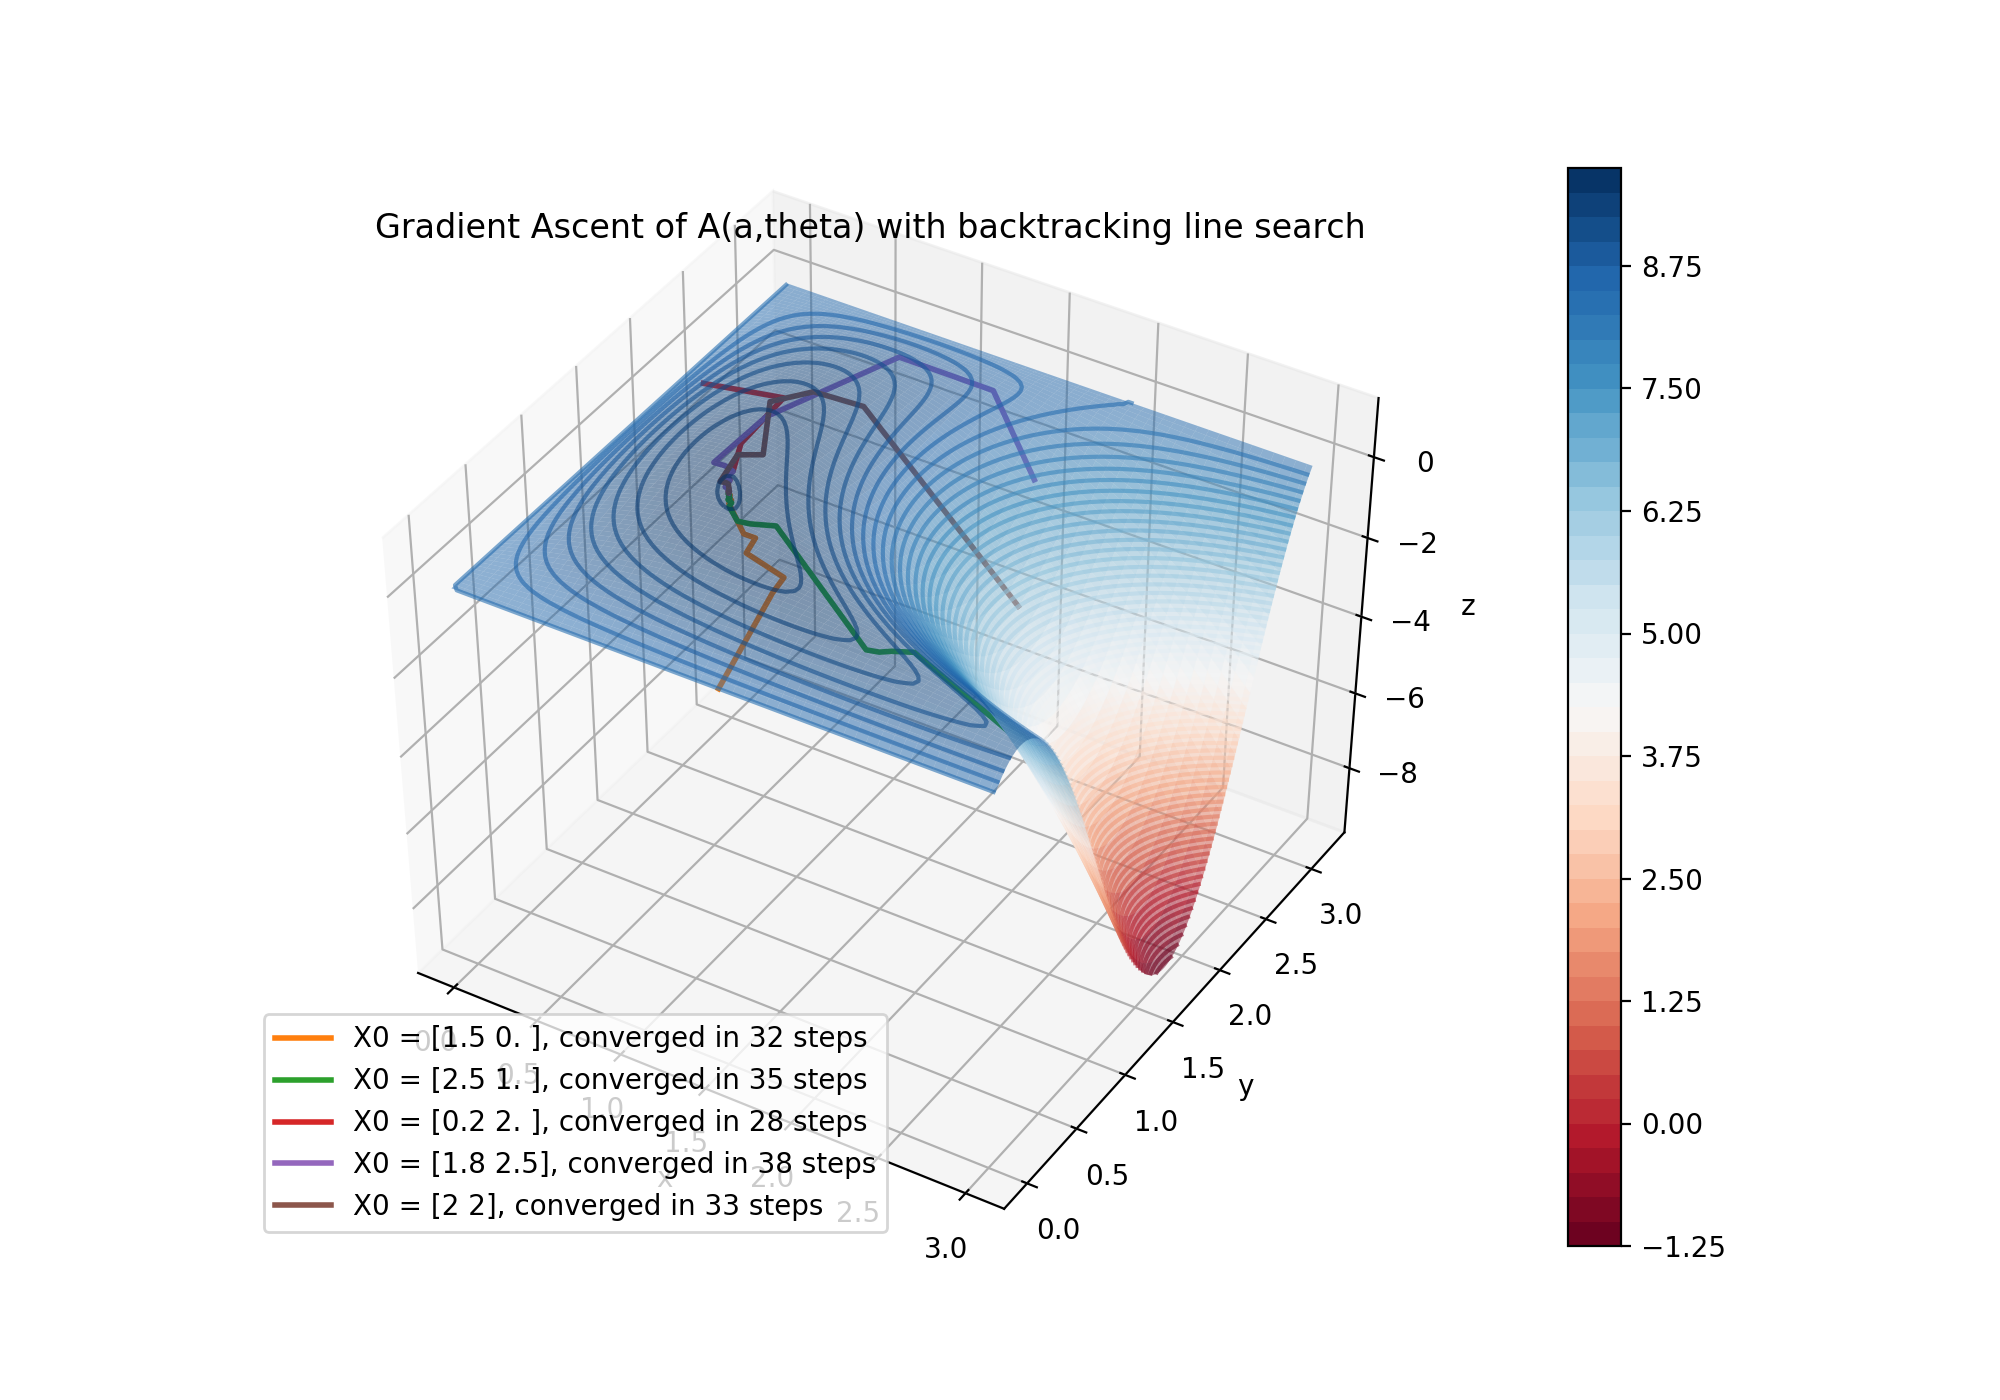

In [5]:
%matplotlib notebook
plot3d(Xinits,line_search=True)

In [7]:
import pandas as pd

X0=np.array([1.5,0])
R = gradient_ascent(X0,line_search=True)
X_k0, X_k1 = R[1],R[2]
F = [A(X_k0[i],X_k1[i]) for i in range(len(X_k0))]
DF = pd.DataFrame(data = {'a':X_k0,'theta':X_k1,'A(a,theta)':F})
t = list(range(5))+list(range(-10,0))
DF.iloc[t,:]

,a,theta,"A(a,theta)"
0,1.500000,0.000000,0.000000
1,1.500000,0.500000,1.034875
2,1.489436,0.624553,1.083232
3,1.246216,0.682380,1.140715
4,1.223727,0.805341,1.162833
22,0.928229,1.047150,1.205771
23,0.928229,1.047165,1.205771
24,0.928215,1.047172,1.205771
25,0.928217,1.047180,1.205771
26,0.928210,1.047184,1.205771


In [8]:
R = gradient_ascent(X0,line_search=False)
X_k0, X_k1 = R[1],R[2]
F = [A(X_k0[i],X_k1[i]) for i in range(len(X_k0))]
DF = pd.DataFrame(data = {'a':X_k0,'theta':X_k1,'A(a,theta)':F})
t = list(range(5))+list(range(-10,0))
DF.iloc[t,:]

,a,theta,"A(a,theta)"
0,1.500000,0.000000,0.000000
1,1.500000,0.033750,0.111301
2,1.500472,0.065944,0.212509
3,1.501327,0.096594,0.304217
4,1.502487,0.125722,0.387050
1575,0.928309,1.047040,1.205771
1576,0.928308,1.047040,1.205771
1577,0.928307,1.047041,1.205771
1578,0.928307,1.047042,1.205771
1579,0.928306,1.047043,1.205771
